In [26]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   ------- -------------------------------- 0.3/1.4 MB 3.3 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 6.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00


In [2]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=76339dcc0ac9f750f2c18a087e67a499e5ed920cf38cde465d29b45174f10284
  Stored in directory: c:\users\ajayd\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [41]:
from apyori import apriori
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from mlxtend.frequent_patterns import apriori

In [3]:
df=pd.read_excel("Online retail.xlsx",header=None)

In [4]:
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [26]:
df.shape

(7501, 1)

In [10]:
# Transforming the data to proper format 
df['Processed'] = df[0].str.split(',')

# Expand the lists into separate columns
df_expanded = df['Processed'].apply(pd.Series)

In [13]:
df_expanded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_expanded.shape

(7501, 20)

In [20]:
# Preprocessing on Data
#Here we need a data in form of list for Apriori Algorithm.

records = []
for i in range(1, 7501):
    records.append([str(df_expanded.values[i, j]) for j in range(0, 20)])
print(type(records))

<class 'list'>


In [21]:
# apply algorithm on data.
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [22]:
print("There are {} Relation derived.".format(len(association_results)))

There are 48 Relation derived.


In [23]:
# Association Rules Derived
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'light cream', 'chicken'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'whole wheat pasta', 'olive oil'})
frozenset({'shrimp', 'pasta'})
frozenset({'nan', 'light cream', 'chicken'})
frozenset({'frozen vegetables', 'chocolate', 'shrimp'})
frozenset({'cooking oil', 'spaghetti', 'ground beef'})
frozenset({'mushroom cream sauce', 'nan', 'escalope'})
frozenset({'nan', 'pasta', 'escalope'})
frozenset({'frozen vegetables', 'spaghetti', 'ground beef'})
frozenset({'frozen vegetables', 'olive oil', 'milk'})
frozenset({'frozen vegetables', 'mineral water', 'shrimp'})
frozenset({'frozen vegetables', 'spaghetti', 'olive oil'})
frozenset({'frozen vegetables', 'shrimp', 'spaghetti'})
frozenset({'frozen vegetables', 'spaghetti', 'tomatoes'})
frozenset({'spaghetti', 'grated cheese', 'ground beef'})
frozenset({'herb & pepper', 'ground beef', 'mineral water'})


In [24]:
# Rules Generated
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: whole wheat pasta -> olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: shrimp -> pasta
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: nan -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: frozen vegetables -> chocolate
Support: 0.005333333333333333
Confidence: 0.23255813953488372
L

In [25]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [29]:
te = TransactionEncoder()
te_try = te.fit(dataset).transform(dataset)

In [30]:
df = pd.DataFrame(te_try, columns=te.columns_)

In [31]:
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [33]:
#Model Training
apriori(df,min_support=0.5)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [34]:
#Model Training with Column Result return

apriori(df,min_support=0.5, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [35]:
# Calculate the length of Itemset

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Onion, Eggs)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [36]:
#Length is 2 and Support is > 0.8
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.8) ]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [37]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


In [38]:
# Verbose return the number of iteration and itemset default size

apriori(df, min_support=0.6, use_colnames=True, verbose=1)

Processing 21 combinations | Sampling itemset size 3


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [39]:
#Using Max_len set the itemset
apriori(df, min_support=0.6, use_colnames=True, verbose=1, max_len=3)

Processing 21 combinations | Sampling itemset size 3


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


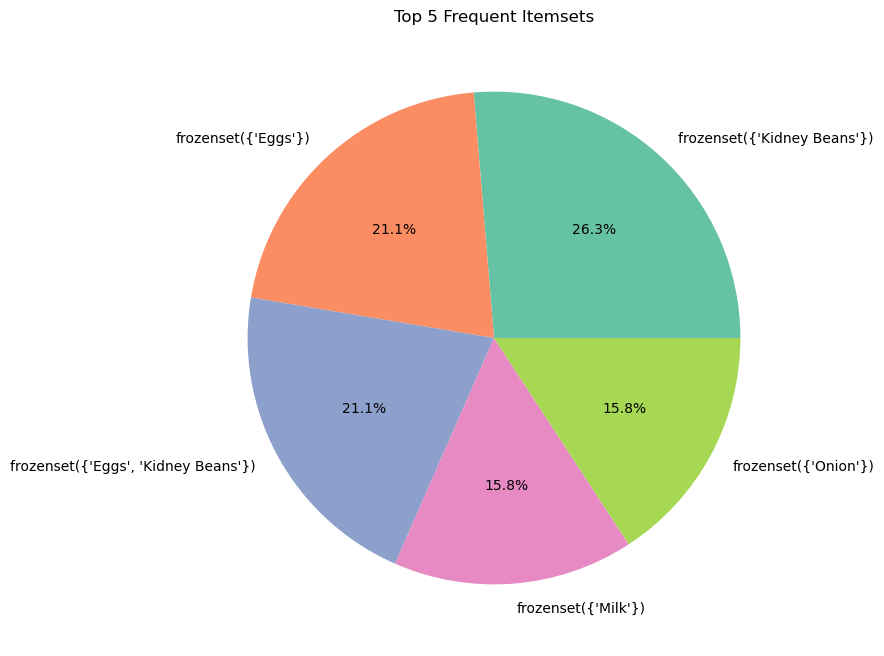

In [45]:
# This will give a pie chart of the top 5 most frequent itemsets.
top_5_itemsets = frequent_itemsets.nlargest(5, 'support')

plt.figure(figsize=(8, 8))
plt.pie(top_5_itemsets['support'], labels=top_5_itemsets['itemsets'].astype(str), autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Top 5 Frequent Itemsets')
plt.show()

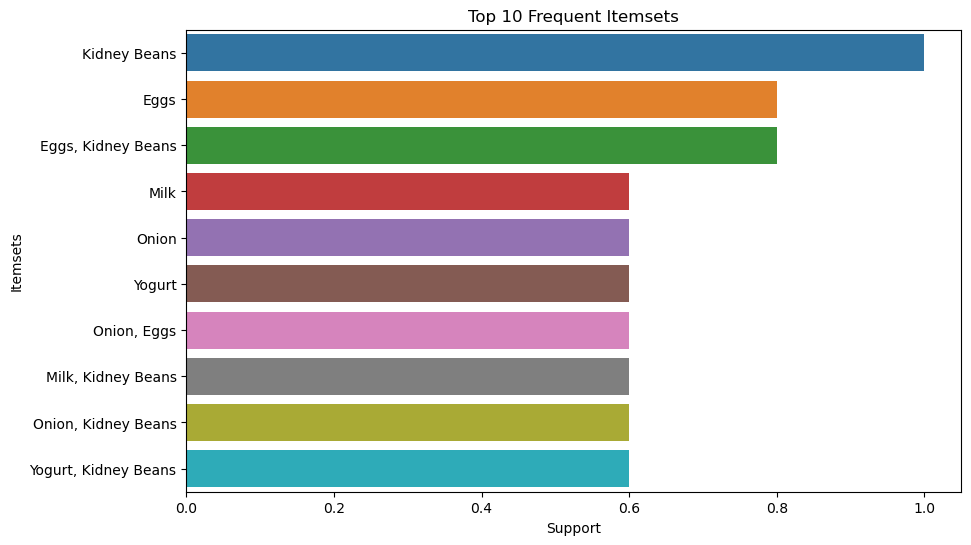

In [46]:
# Convert itemsets to strings for visualization
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Bar plot for the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x=frequent_itemsets.nlargest(10, 'support')['support'], y=frequent_itemsets.nlargest(10, 'support')['itemsets_str'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.show()

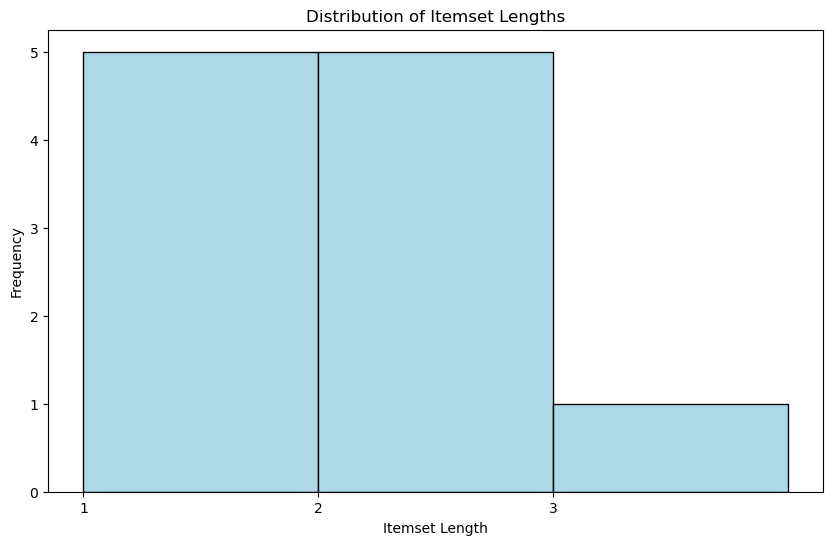

In [50]:
# Plot histogram of itemset lengths
plt.figure(figsize=(10, 6))
plt.hist(frequent_itemsets['length'], bins=range(1, frequent_itemsets['length'].max() + 2), edgecolor='black', color='lightblue')
plt.xlabel('Itemset Length')
plt.ylabel('Frequency')
plt.title('Distribution of Itemset Lengths')
plt.xticks(range(1, frequent_itemsets['length'].max() + 1))
plt.show()

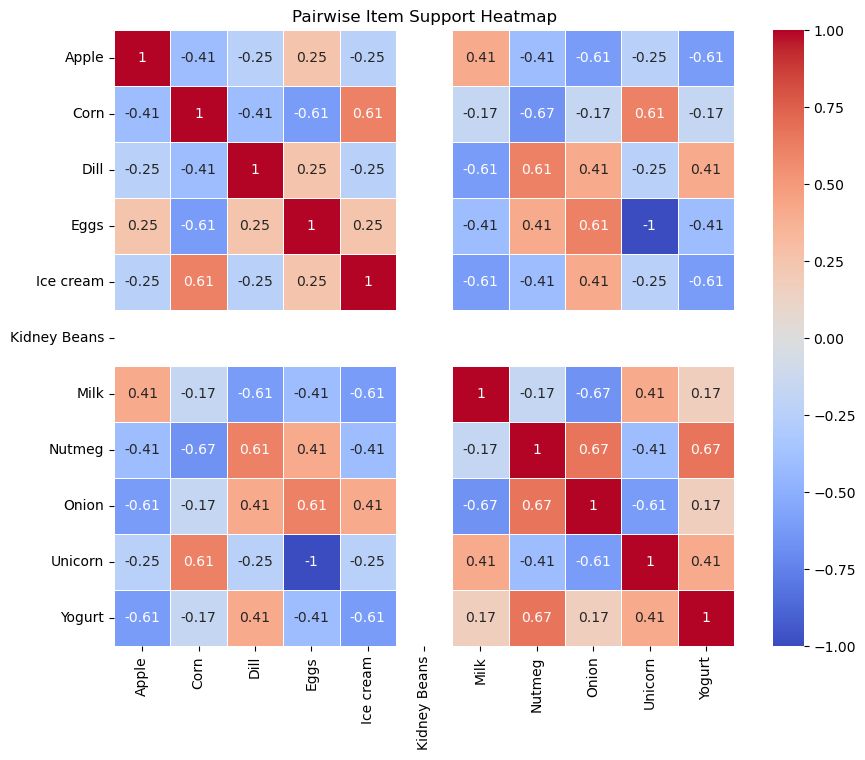

In [42]:
# Create a pairwise support matrix
pairwise_support = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_support, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Item Support Heatmap')
plt.show()

In [ ]:
# Key Observations:
# Kidney Beans (1.0) are the most popular, appearing in all transactions. 
# Eggs (0.8) are also frequently bought.
# Items like Milk, Onion, and Yogurt (0.6) appear in 60% of transactions.
# Eggs & Kidney Beans (0.8) are commonly bought together, followed by other pairs 
# like Onion & Kidney Beans (0.6) and Milk & Kidney Beans (0.6).
# Onion, Eggs, and Kidney Beans (0.6) are often bought together, indicating a strong relationship between these items.


# Insights:
# Kidney Beans are a central product, often bought with items like Eggs, Milk, and Onion, suggesting customers
# are shopping for meal preparation. Dairy products (Milk and Yogurt) also frequently pair with staples.
# This pattern suggests promoting cross-product bundles or meal kits could drive sales, especially with common 
# combinations like Kidney Beans, Eggs, and Onion.

In [40]:
# What is Lift and Why is it Important in Association Rules?

# Lift measures how much more likely two items are to be bought together than expected if they were independent.
# It's important because it helps identify strong associations. A lift value greater than 1 indicates a positive association,
# while a value less than 1 suggests a negative association.

In [ ]:
# What is Support and Confidence? How Do You Calculate Them?

# Support: This is the proportion of transactions in the dataset that contain a particular itemset. It is calculated as:
        
# Support(A)=Number of transactions containing A/Total number of transactions
 
# Confidence: This measures the likelihood that item B is purchased when item A is purchased. It is calculated as:
        
# Confidence(𝐴->𝐵)=Support(AUB)/Support(A)

In [ ]:
# What are Some Limitations or Challenges of Association Rules Mining?

# Scalability: Association rule mining can be computationally intensive, especially with large datasets.

# Interpretability: It can generate a large number of rules, making it difficult to identify the most meaningful ones.

# Choice of Thresholds: Setting the right support, confidence, and lift thresholds can be challenging,
# as too high thresholds may lead to missing important rules, while too low thresholds may result in too many insignificant rules.